
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

##### Scenario 1: State tax board
You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year to inform their decision.

##### Goal for Scenario #1: Your task is as follows:

- Calculate the yearly liquor sales for each store using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
- Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from January to March as one of your variables.
- Use your model for 2015 to estimate total sales in 2016, extrapolating from the sales so far for January to March of 2016.
- Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
- Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.
- Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.

In [176]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 24)
%matplotlib inline

In [177]:
liquor = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

In [178]:
liquor["Date"] = pd.to_datetime(liquor["Date"])

In [179]:
#Changing column types from object to floats
liquor['State Bottle Cost'] = liquor['State Bottle Cost'].str.replace('$', '').astype(float)
liquor['State Bottle Retail'] = liquor['State Bottle Retail'].str.replace('$', '').astype(float)
liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].str.replace('$', '').astype(float)
#Changing column types from floats to int
liquor['County Number'] = liquor['County Number'].astype(int)
liquor['Category'] = liquor['Category'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [214]:
liquor['year'] = liquor['Date'].dt.year
liquor['month'] = liquor['Date'].dt.month
liquor['quarter'] = liquor['Date'].dt.quarter

In [ ]:
liquor2015 = liquor[liquor['year'] == 2015]

In [215]:
liquor2016 = liquor[liquor['year'] == 2016]

In [ ]:
liquor.shape

In [ ]:
liquor.isnull().sum()

In [ ]:
liquor = liquor.dropna()

In [ ]:
liquor.isnull().sum()

In [ ]:
liquor.info()

In [211]:
liquor2015['Sale (Dollars)'].sum()

28527245.39000142

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

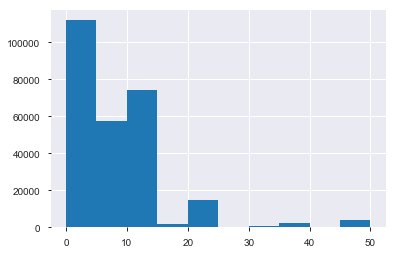

In [204]:
plt.hist(liquor['Bottles Sold'], range = (0,50), label='Bottles Sold')

plt.show()


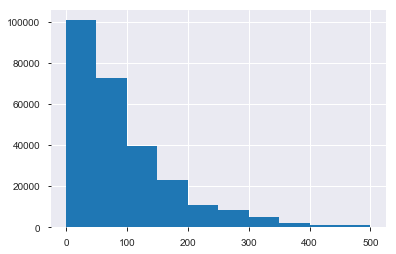

In [205]:
plt.hist(liquor['Sale (Dollars)'], range = (0,500), label='Sale (Dollars)')

plt.show()


In [64]:
liquor['County'].value_counts()

Polk             49102
Linn             23511
Scott            16678
Black Hawk       15083
Johnson          13189
Pottawattamie     9111
Story             8959
Woodbury          8562
Dubuque           7757
Cerro Gordo       6374
Des Moines        4090
Muscatine         3983
Clinton           3576
Wapello           3529
Dickinson         3413
Lee               3324
Webster           3154
Marshall          2996
Jasper            2834
Buena Vista       2748
Dallas            2708
Marion            2603
Warren            2465
Bremer            2243
Boone             2110
Poweshiek         2089
Clay              1917
Carroll           1915
Jones             1874
O'Brien           1720
                 ...  
Greene             677
Wright             672
Shelby             663
Ida                634
Howard             607
Humboldt           588
Adair              585
Grundy             566
Pocahontas         525
Mills              508
Louisa             484
Lucas              476
Chickasaw  

In [65]:
topliquor = liquor2015.groupby("County").filter(lambda x: len(x) > 5000)


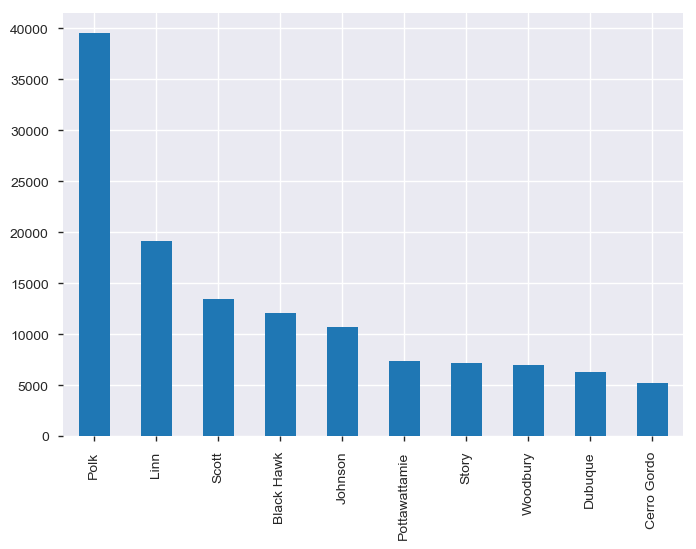

In [66]:
topliquor['County'].value_counts().plot(kind='bar')

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


In [ ]:
# The majority of sales are very small, under $200.
# Similarly, the majority of bottles sold per transaction is under 20
# Minimum sale was one bottle for $1.34, and the maximum sale was 2508 bottles for $36,392.40.
# The average sale was 9.87 bottles and $128.90.
# Total sales for 2015 were $2,852,7245.39.
# Polk County has overwhelmingly the most sales.

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [81]:
liquor2015Q1 = liquor2015[liquor2015['month'].isin([1,2,3])]
liquor2015Q1.shape

(49791, 21)

In [133]:
liquor2015_grouped = liquor2015.groupby('Store Number')[['Bottle Volume (ml)','State Bottle Cost','Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'Volume Sold (Gallons)']].mean()
liquor2015_grouped

,Bottle Volume (ml),State Bottle Cost,Sale (Dollars),Bottles Sold,State Bottle Retail,Volume Sold (Gallons)
Store Number,,,,,,
2106,908.159393,10.309545,277.658861,19.671727,15.475863,4.879184
2113,946.428571,10.870544,63.334830,4.564626,16.315646,1.185646
2130,929.974490,9.838444,285.386301,18.954082,14.764286,4.644515
2152,1060.283688,8.565035,54.759433,4.063830,12.887660,1.186383
2178,1019.831224,9.689831,102.633671,8.135021,14.558692,2.137131
2190,804.030418,11.515468,92.539209,8.449430,17.289726,1.271103
2191,984.270134,11.549178,209.888406,12.912752,17.327265,3.569732
2200,1117.990074,11.207469,56.604342,4.138958,16.828337,1.191092
2205,879.687500,10.159757,85.699271,6.534722,15.258542,1.428160


In [134]:
liquor2015Q1_grouped = liquor2015Q1.groupby('Store Number')[['Bottle Volume (ml)','State Bottle Cost','Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'Volume Sold (Gallons)']].mean()
liquor2015Q1_grouped

,Bottle Volume (ml),State Bottle Cost,Sale (Dollars),Bottles Sold,State Bottle Retail,Volume Sold (Gallons)
Store Number,,,,,,
2106,886.434109,10.041550,304.552636,20.968992,15.075271,5.173721
2113,854.166667,10.546190,67.458333,4.666667,15.821190,1.114286
2130,955.747126,10.260460,278.995057,17.620690,15.401379,4.394598
2152,1093.750000,9.624062,62.608125,4.812500,14.460938,1.252500
2178,985.937500,9.816458,122.008542,10.208333,14.748542,2.255833
2190,809.654179,10.908242,84.878732,7.368876,16.376282,1.269712
2191,1024.668874,11.626424,192.619669,12.370861,17.453974,3.423974
2200,1127.380952,11.716310,58.338452,4.023810,17.595357,1.156310
2205,878.214286,10.629000,91.539143,6.657143,15.953000,1.416429


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [60]:
liquor.describe()[['Bottle Volume (ml)','State Bottle Cost','State Bottle Retail', 
                    'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)' ]]


,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351
std,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690
min,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000
25%,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000
50%,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000
75%,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000
max,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000


In [59]:
pandas_profiling.ProfileReport(liquor)

Number of variables,18
Number of observations,270955
Total Missing (%),0.1%
Total size in memory,37.2 MiB
Average record size in memory,144.0 B
Numeric,10
Categorical,5
Boolean,0
Date,1
Text (Unique),0
Rejected,2


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Separate target variable from predictors

In [86]:
liquor.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [87]:
# Separate the target variable from predictors
y = liquor['Sale (Dollars)']
X = liquor[['Bottle Volume (ml)','State Bottle Cost']]
X.head()

,Bottle Volume (ml),State Bottle Cost
0,750,4.50
1,750,13.75
2,1000,12.59
3,1750,9.50
4,1750,7.20


## Split Data into training and testing

In [90]:
# split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33)
X_train.head()

,Bottle Volume (ml),State Bottle Cost
266173,750,9.65
202809,750,14.17
187792,1000,4.13
106150,1750,9.44
136596,1750,11.80


## Standardize the Training Set

In [91]:
# standardize the predictors

ss_instance = StandardScaler()  # Create an instance of StandardScaler class
ss_instance.fit(X_train)  # "fit" aka customize this instance to the data at hand (find and store mean, std of each col)
X_train_ss = ss_instance.transform(X_train)  # actually perform standardization calcuations and store result in "X_train_ss"
X_train_ss = pd.DataFrame(X_train_ss,index=X_train.index,columns=X_train.columns)
X_train_ss.head()

,Bottle Volume (ml),State Bottle Cost
266173,-0.355488,-0.016760
202809,-0.355488,0.626599
187792,0.150893,-0.802456
106150,1.670035,-0.046651
136596,1.670035,0.289263


## Make an initial "bad" model

In [92]:
# Let's make a model
lr = LinearRegression()  # Create an instance of a LinearRegression object/class
lr.fit(X_train_ss,y_train)  # fit the LinearRegression object to our data (finds Betas that minimize SSE)
lr.score(X_train_ss,y_train)  # get an R^2 score

0.019779594527933875

## Go back to feature selection/model selection/EDA steps to improve score

In [101]:
stores_Q1 = [store for store in liquorQ12015['Store Number'].unique()]
stores_Q1

[3858,
 2614,
 2590,
 3942,
 3981,
 3390,
 2545,
 2555,
 2549,
 2644,
 3808,
 2514,
 3612,
 2623,
 2578,
 2191,
 4167,
 2571,
 3461,
 2513,
 2665,
 4847,
 2648,
 4419,
 4110,
 4898,
 2512,
 4307,
 4129,
 3868,
 3514,
 3045,
 4678,
 2353,
 2626,
 4512,
 2605,
 5070,
 2594,
 2567,
 5020,
 2532,
 3723,
 2612,
 3644,
 4962,
 2633,
 3912,
 4829,
 4345,
 2573,
 4819,
 3525,
 3606,
 3529,
 3562,
 3894,
 3818,
 4843,
 4008,
 3400,
 4622,
 4665,
 4025,
 2635,
 2600,
 4073,
 4085,
 5034,
 5093,
 2501,
 3712,
 2609,
 2508,
 2569,
 2643,
 2572,
 4608,
 4874,
 2568,
 3907,
 2543,
 3722,
 2593,
 3704,
 2619,
 5081,
 2536,
 4452,
 3443,
 4349,
 3881,
 2178,
 4988,
 5089,
 2515,
 3756,
 3692,
 2538,
 2544,
 2500,
 5031,
 3732,
 4596,
 2637,
 3420,
 2651,
 4617,
 2962,
 4670,
 4273,
 4001,
 2518,
 2517,
 4515,
 4619,
 2806,
 2550,
 4344,
 4745,
 4597,
 4655,
 4810,
 2603,
 3963,
 3385,
 4645,
 4823,
 3524,
 2413,
 4502,
 2200,
 3890,
 4710,
 4148,
 4455,
 2505,
 3916,
 2621,
 5018,
 4752,
 2561,
 4265,

In [103]:
drop_list

[]

In [107]:
liquor2015_groupedstores = liquor2015_grouped.copy()
drop_list = []
for row in liquor2015_grouped.index:
    if row in stores_Q1:
        continue
    else:
        drop_list.append(row)
liquor2015_groupedstores = liquor2015_groupedstores.drop(drop_list)
liquor2015_groupedstores.shape

(1262, 3)

### Drop all stores from "all" df that did not exist in Q1

In [167]:
y =liquor2015_groupedstores['Sale (Dollars)']
X =liquor2015Q1_grouped[[ 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Gallons)']]
X.head()

,State Bottle Retail,Bottles Sold,Volume Sold (Gallons)
Store Number,,,
2106,15.075271,20.968992,5.173721
2113,15.821190,4.666667,1.114286
2130,15.401379,17.620690,4.394598
2152,14.460938,4.812500,1.252500
2178,14.748542,10.208333,2.255833


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33)
X_train.head()

,State Bottle Retail,Bottles Sold,Volume Sold (Gallons)
Store Number,,,
5108,13.659286,7.642857,1.203571
4326,14.734444,7.000000,2.528889
3635,11.123810,6.809524,1.966190
4203,12.313864,11.295455,2.690227
4971,18.415714,10.357143,2.280714


In [169]:
ss_instance = StandardScaler()  # Create an instance of StandardScaler class
ss_instance.fit(X_train)  # "fit" aka customize this instance to the data at hand (find and store mean, std of each col)
X_train_ss = ss_instance.transform(X_train)  # actually perform standardization calcuations and store result in "X_train_ss"
X_train_ss = pd.DataFrame(X_train_ss,index=X_train.index,columns=X_train.columns)
X_train_ss.head()

,State Bottle Retail,Bottles Sold,Volume Sold (Gallons)
Store Number,,,
5108,0.025857,-0.367560,-0.561508
4326,0.308470,-0.462559,0.140236
3635,-0.640611,-0.490706,-0.157708
4203,-0.327797,0.172208,0.225664
4971,1.276118,0.033547,0.008830


In [222]:
X_test_ss = pd.DataFrame(ss_instance.transform(X_test), index=X_test.index, columns=X_test.columns)
X_test_ss.head()

,State Bottle Retail,Bottles Sold,Volume Sold (Gallons)
Store Number,,,
5033,0.020262,0.956093,-0.027554
2568,-0.399940,-0.054415,-0.047082
3987,0.866594,-0.043065,-0.084465
2603,0.973492,-0.352586,-0.247010
4337,3.912267,-0.677506,-0.201901


In [170]:
lr = LinearRegression()  # Create an instance of a LinearRegression object/class
lr.fit(X_train_ss,y_train)  # fit the LinearRegression object to our data (finds Betas that minimize SSE)
lr.score(X_train_ss,y_train)

0.69174480872909738

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [216]:
liquor2016.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,quarter
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2,1
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79,2016,1,1
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,Kinky Liqueur,750,10.00,15.00,12,180.00,9.0,2.38,2016,2,1


In [197]:
X = liquor2015Q1_grouped[['Sale (Dollars)']]

In [201]:
X.shape

(1262, 1)

In [224]:
lr.score(X_test,y_test)

-111.45749837971505

In [226]:
predicted = lr.predict(X_test_ss)
predicted


array([  167.94495567,   104.2961691 ,   140.08083144,   119.75719008,
         191.77749059,    57.64850393,    23.0114374 ,   116.13723212,
         123.96640603,   133.98579457,   101.00832506,    62.35814902,
         168.47062438,   123.53535803,   129.4996904 ,    75.31076002,
         144.46135416,    41.17164383,   543.23557595,    90.62437879,
         188.4283014 ,   136.44640511,   115.47246493,   107.84897369,
          -7.29893312,   135.84509468,   199.42807463,    65.63580818,
          99.97888948,   189.97274902,    80.86279465,    69.23301428,
         167.14342392,    97.68860606,   150.48880992,   220.633786  ,
          73.73663975,    74.1395537 ,   114.24668599,    23.57220174,
         179.23795998,   159.48279349,    84.36812664,   124.95873521,
          93.94383181,   369.4362782 ,   148.1377008 ,   197.73441092,
          84.29946238,   160.74028527,    69.42816204,   151.12471481,
         222.31624643,    93.71687465,   175.83556276,    11.48480533,
      

ValueError: x and y must be the same size

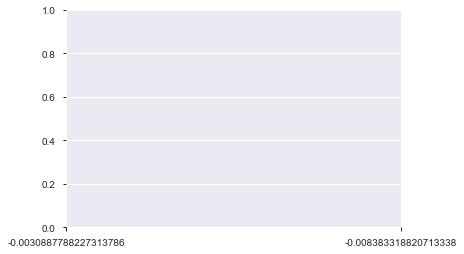

In [228]:
plt.scatter(X_test_ss, predicted)
plt.show()

In [229]:
X_test_ss.shape

(417, 3)

In [230]:
predicted.shape

(417,)

In [173]:
y_train.mean()

121.03535167384531

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.